## Importing libraries:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

Read in the data:

In [2]:
df = pd.read_csv('KNN_Project_Data')


check head, info and description of the DataFrame:

In [3]:
df.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
0,1636.670614,817.988525,2565.995189,358.347163,550.417491,1618.870897,2147.641254,330.727893,1494.878631,845.136088,0
1,1013.402760,577.587332,2644.141273,280.428203,1161.873391,2084.107872,853.404981,447.157619,1193.032521,861.081809,1
2,1300.035501,820.518697,2025.854469,525.562292,922.206261,2552.355407,818.676686,845.491492,1968.367513,1647.186291,1
3,1059.347542,1066.866418,612.000041,480.827789,419.467495,685.666983,852.867810,341.664784,1154.391368,1450.935357,0
4,1018.340526,1313.679056,950.622661,724.742174,843.065903,1370.554164,905.469453,658.118202,539.459350,1899.850792,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
XVPM            1000 non-null float64
GWYH            1000 non-null float64
TRAT            1000 non-null float64
TLLZ            1000 non-null float64
IGGA            1000 non-null float64
HYKR            1000 non-null float64
EDFS            1000 non-null float64
GUUB            1000 non-null float64
MGJM            1000 non-null float64
JHZC            1000 non-null float64
TARGET CLASS    1000 non-null int64
dtypes: float64(10), int64(1)
memory usage: 86.1 KB


In [5]:
df.describe()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,1055.071157,991.851567,1529.373525,495.107156,940.590072,1550.637455,1561.003252,561.346117,1089.067338,1452.521629,0.50000
std,370.980193,392.278890,640.286092,142.789188,345.923136,493.491988,598.608517,247.357552,402.666953,568.132005,0.50025
min,21.170000,21.720000,31.800000,8.450000,17.930000,27.930000,31.960000,13.520000,23.210000,30.890000,0.00000
25%,767.413366,694.859326,1062.600806,401.788135,700.763295,1219.267077,1132.097865,381.704293,801.849802,1059.499689,0.00000
50%,1045.904805,978.355081,1522.507269,500.197421,939.348662,1564.996551,1565.882879,540.420379,1099.087954,1441.554053,0.50000
75%,1326.065178,1275.528770,1991.128626,600.525709,1182.578166,1891.937040,1981.739411,725.762027,1369.923665,1864.405512,1.00000
max,2117.000000,2172.000000,3180.000000,845.000000,1793.000000,2793.000000,3196.000000,1352.000000,2321.000000,3089.000000,1.00000


# EDA

Since this data is artificial, we'll just do a large pairplot with seaborn.


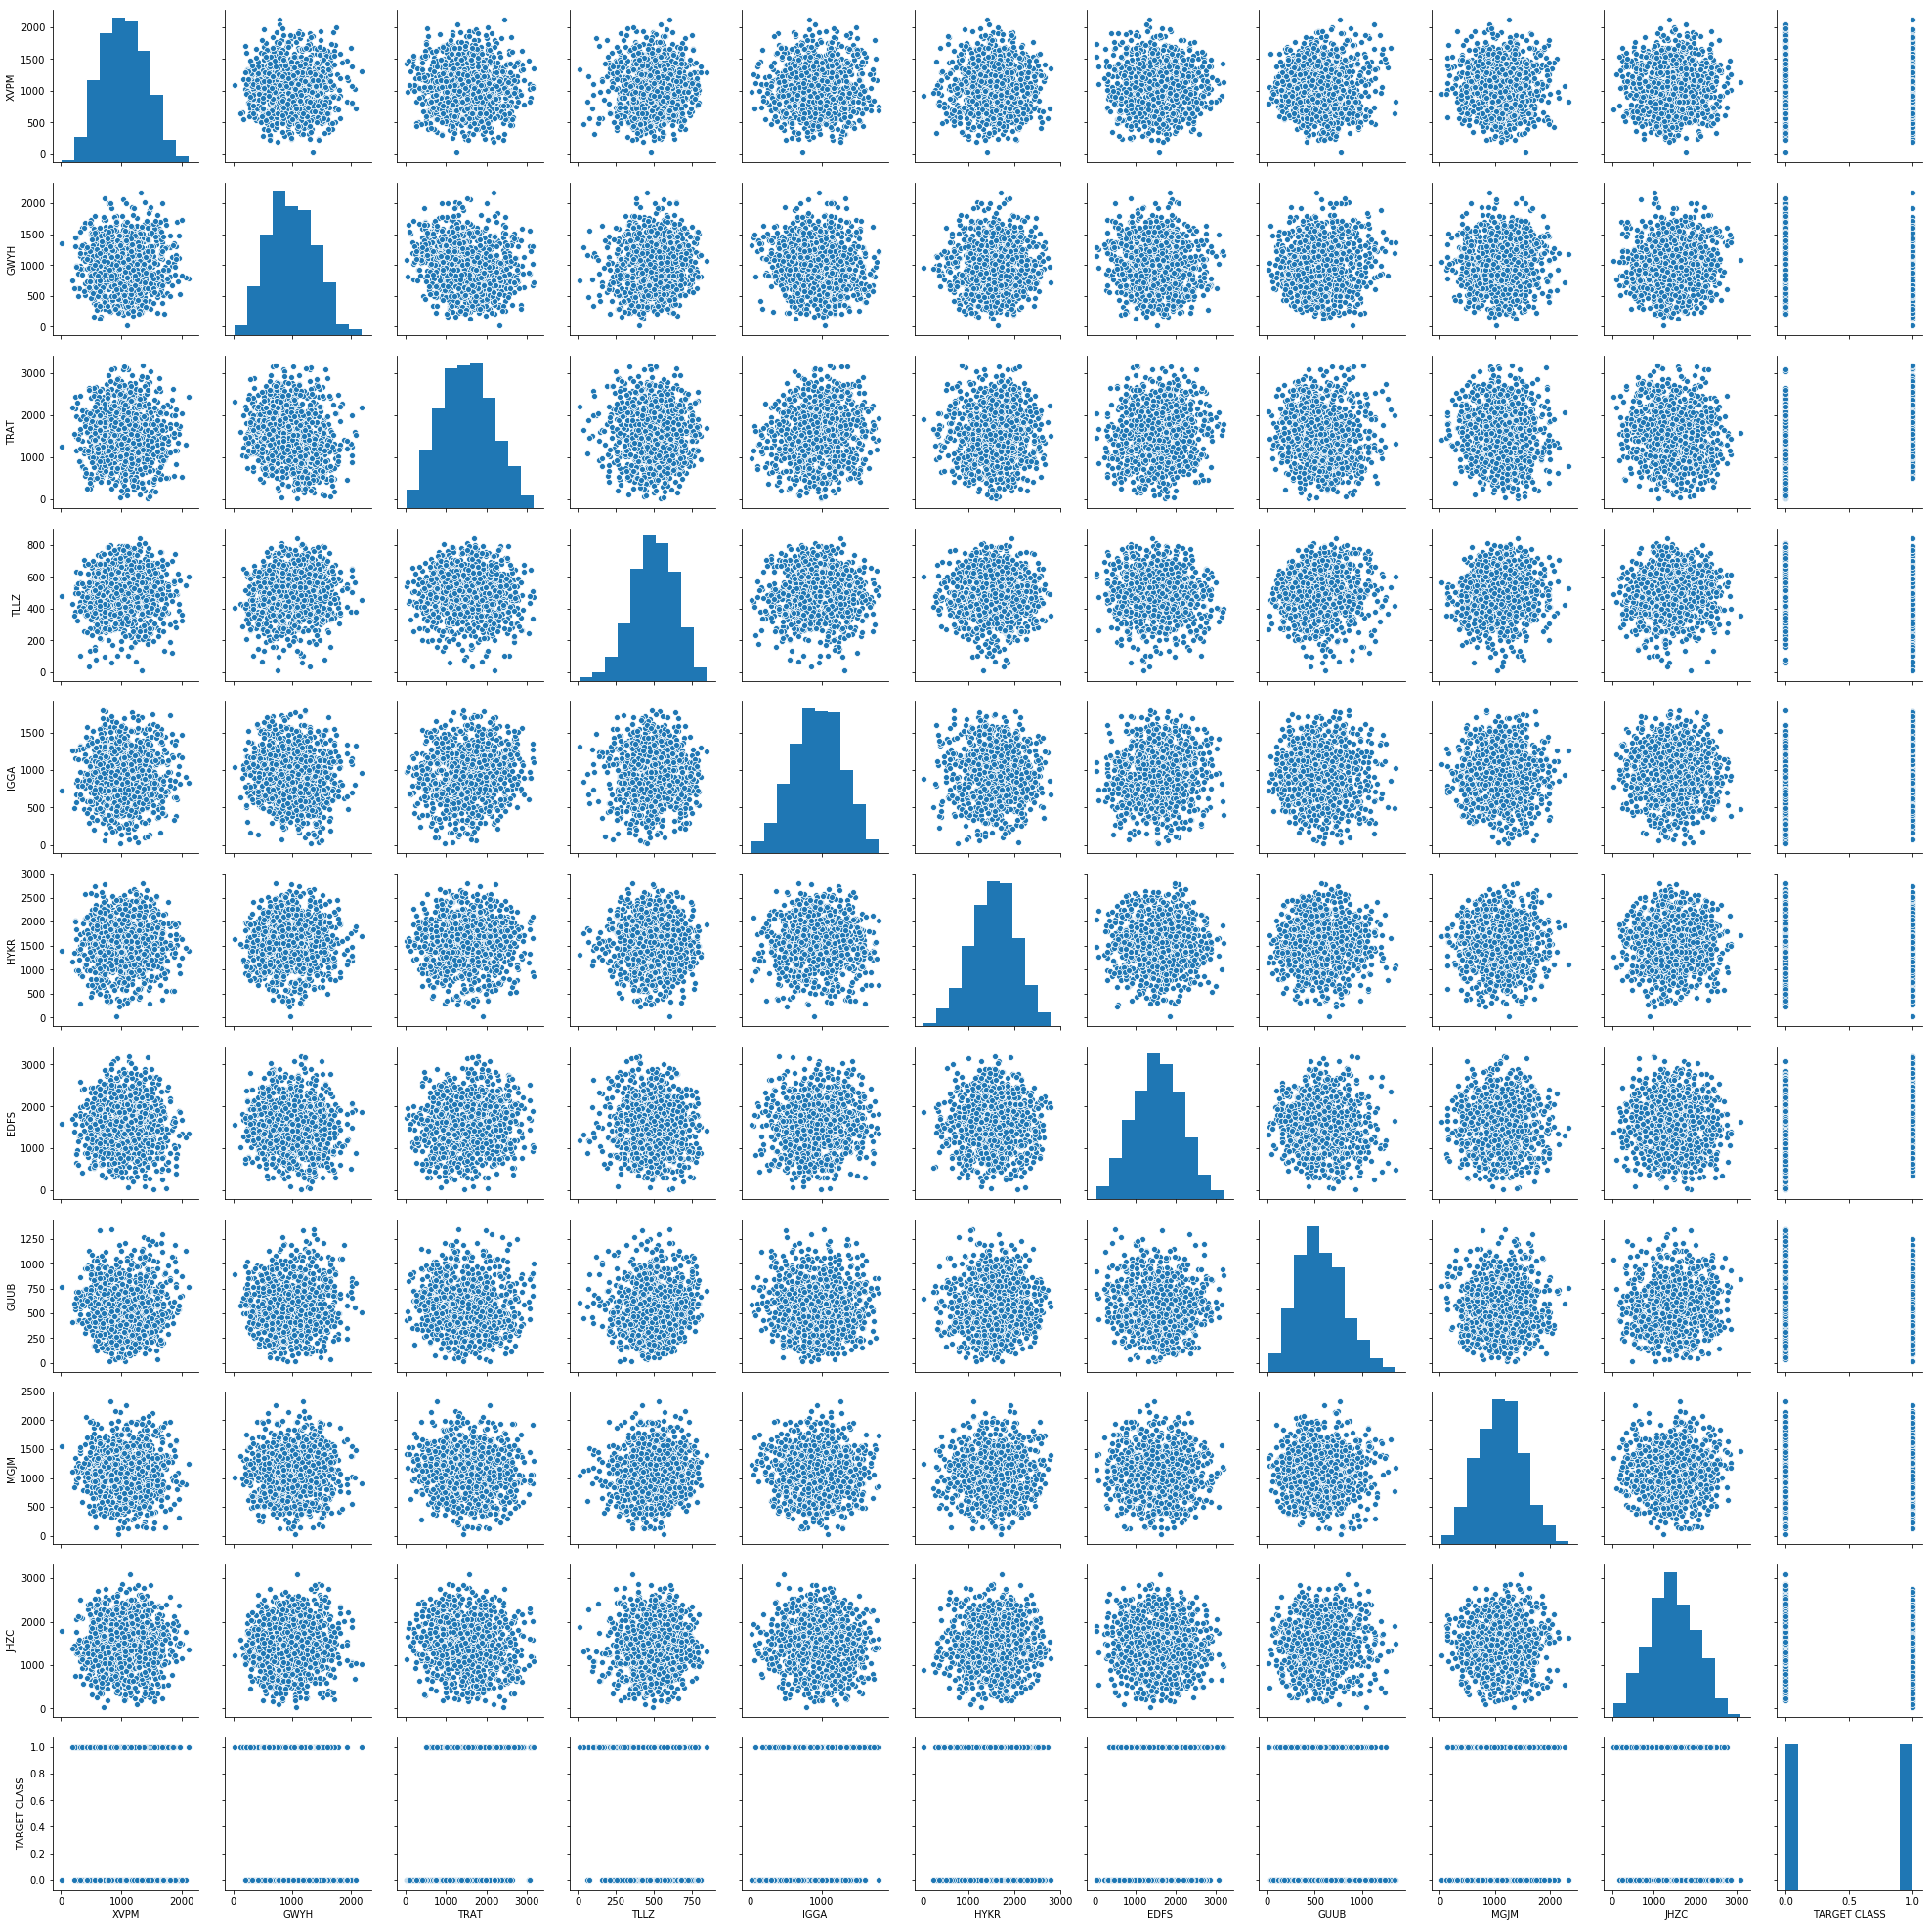

In [8]:
sns.pairplot(df)

## Standardize the variables to obtain working data that is in the same scale:

In [13]:
#import StandardScaler
from sklearn.preprocessing import StandardScaler

#initialize the scaler and fit data
scaler = StandardScaler()
scaler.fit(df.drop('TARGET CLASS', axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [16]:
#transform features
scaled_features = scaler.transform(df.drop('TARGET CLASS', axis=1))

### Convert the scaled features to a dataframe:

In [17]:
df_features = pd.DataFrame(scaled_features, columns=df.columns[:-1])

In [18]:
#check head of this dataframe
df_features.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC
0,1.568522,-0.443435,1.619808,-0.958255,-1.128481,0.138336,0.980493,-0.932794,1.008313,-1.069627
1,-0.112376,-1.056574,1.741918,-1.504220,0.640009,1.081552,-1.182663,-0.461864,0.258321,-1.041546
2,0.660647,-0.436981,0.775793,0.213394,-0.053171,2.030872,-1.240707,1.149298,2.184784,0.342811
3,0.011533,0.191324,-1.433473,-0.100053,-1.507223,-1.753632,-1.183561,-0.888557,0.162310,-0.002793
4,-0.099059,0.820815,-0.904346,1.609015,-0.282065,-0.365099,-1.095644,0.391419,-1.365603,0.787762


# Train Test Split

Use train_test_split to split your data into a training set and a testing set.

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X = df_features
y = df['TARGET CLASS']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

## Using KNN

In [22]:
#import KNN
from sklearn.neighbors import KNeighborsClassifier

## Instantiate this model

## First we'll use n_neighbors = 1 then later use elbow method to determine the best k value to use

In [23]:

knn = KNeighborsClassifier(n_neighbors=1)

In [25]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

# Predictions and Evaluations
Let's evaluate our KNN model!

In [28]:
predictions = knn.predict(X_test)

### confusion matrix and classification report:

In [29]:
from sklearn.metrics import classification_report, confusion_matrix

In [30]:
print(classification_report(y_test, predictions))
print('\n')
print(confusion_matrix(y_test, predictions))

              precision    recall  f1-score   support

           0       0.75      0.73      0.74       153
           1       0.72      0.75      0.74       147

    accuracy                           0.74       300
   macro avg       0.74      0.74      0.74       300
weighted avg       0.74      0.74      0.74       300



[[111  42]
 [ 37 110]]


# Choosing a K Value using the Elbow Method
Let's go ahead and use the elbow method to pick a good K Value!

We'll create a for loop that trains various KNN models with different k values, then keep track of the error_rate for each of these models with a list:

In [31]:
error_rate = []

for i in range(1,50):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred = knn.predict(X_test)
    error_rate.append(np.mean(pred != y_test))

Let's view some elements of the error_rate list:

In [34]:
error_rate[:5]

[0.2633333333333333, 0.31, 0.24, 0.21333333333333335, 0.19666666666666666]

### Now let's create a plot to visualize the error_rate and pick an appropriate k value:

Text(0, 0.5, 'Error Rate')

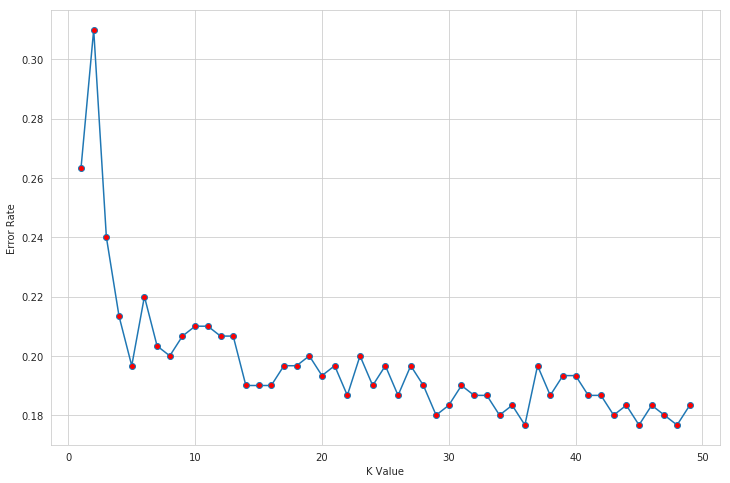

In [42]:
sns.set_style('whitegrid')

plt.figure(figsize=(12,8))
plt.plot(range(1,50), error_rate, marker='o', markerfacecolor='red')
plt.xlabel('K Value')
plt.ylabel('Error Rate')

We'll choose k=30, that's a suitable figure as seen in the figure.

The error rate is small hence this will give better results.

## Retrain the model with the new K Value

Let's retrain our model with the chosen K value and re-do the classification report and the confusion matrix.

In [49]:
knn = KNeighborsClassifier(n_neighbors=30)
knn.fit(X_train, y_train)
predictions = knn.predict(X_test)

In [50]:
print(classification_report(y_test, predictions))
print('\n')
print(confusion_matrix(y_test, predictions))

              precision    recall  f1-score   support

           0       0.82      0.82      0.82       153
           1       0.82      0.81      0.81       147

    accuracy                           0.82       300
   macro avg       0.82      0.82      0.82       300
weighted avg       0.82      0.82      0.82       300



[[126  27]
 [ 28 119]]


### Accuracy of our model increased with 8%. That's a great job!
#### correct predictions increased from 111 + 110 to 126 + 119 while the misclassifications dropped from 37 + 42 to 28 + 27

### We did a good job!